<center><h1>Geração de imagens GASF-GADF-MTF</h1></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cPickle, sys
import cv2
plt.rcParams['figure.figsize'] = (16, 6)

<font color="red"><b><h3>Configurações</h3></b></font>

In [2]:
datafiles = ['Beef',
             'Coffee',
             'OliveOil'];
trains = [30, 28, 30];
PAA_tamanho = [16, 32];
quantile = [6];
PAA_smooth = True;
gaussian_blur = False;
salvar_imagens = True;

<font color="blue"><b><h3>Normalização da série e redução por Aproximação Agregada em Partes (PAA)</h3></b></font>

In [3]:
def reescalar(dados):
    return [(x-min(dados))/float(max(dados)-min(dados)) for x in dados]

def PiecewiseAggregationApproximation(dados, tamanho):
    return [sum(dados[t*(len(dados)/tamanho):(t+1)*(len(dados)/tamanho)])/(len(dados)/tamanho) for t in range(tamanho)]

<font color="blue"><b><h3>Salvar as imagens em arquivos .pkl</h3></b></font>

In [4]:
def pickledata(mat, label, train, name):
    traintp = (mat[:train], label[:train])
    testtp = (mat[train:], label[train:])
    f = file(name+'.pkl', 'wb')
    pickletp = [traintp, testtp]
    cPickle.dump(pickletp, f, protocol=cPickle.HIGHEST_PROTOCOL)
    print 'Imagens salvas em',name+'.pkl'

<font color="green"><b><h3>Transformação das séries temporais em imagens GASF-GADF-MTF</h3></b></font>

Lendo arquivo Beef...
60 conjuntos de dados. Tamanho de cada um:
[471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471]
Gerando imagens para Beef...
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
Dimensões das imagens geradas: (60L, 16L, 16L, 3L)
Imagens salvas em imagens_Beef_16x16.pkl
Gerando imagens para Beef...
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
Dimensões das imagens geradas: (60L, 32L, 32L, 3L)
Imagens salvas em imagens_Beef_32x32.pkl


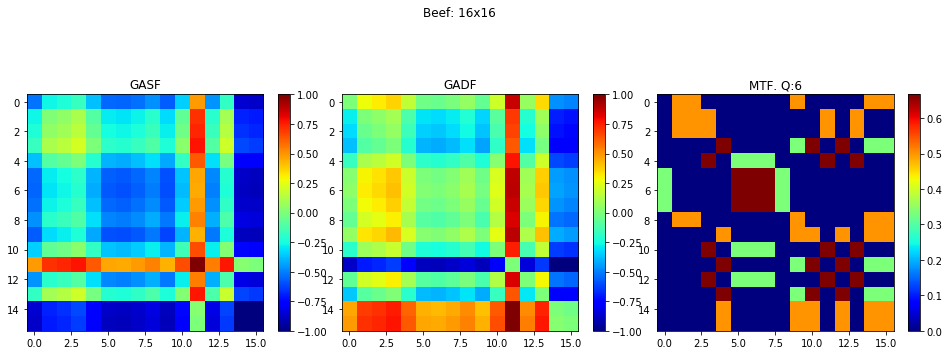

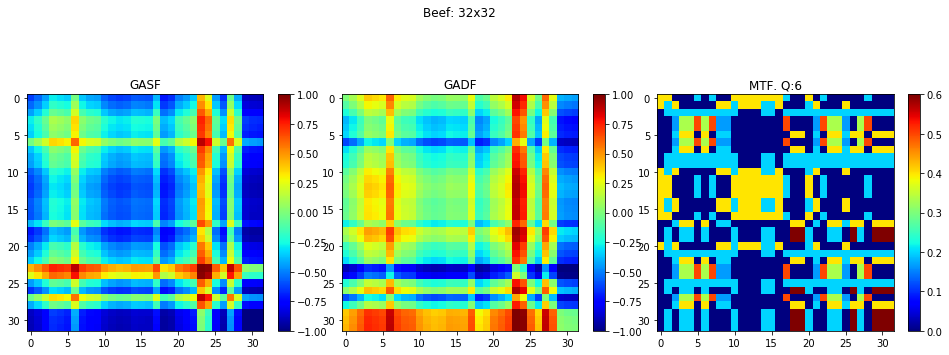

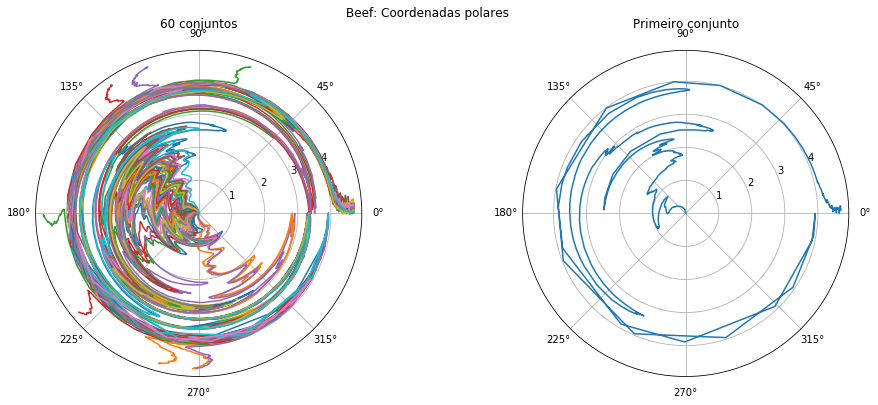

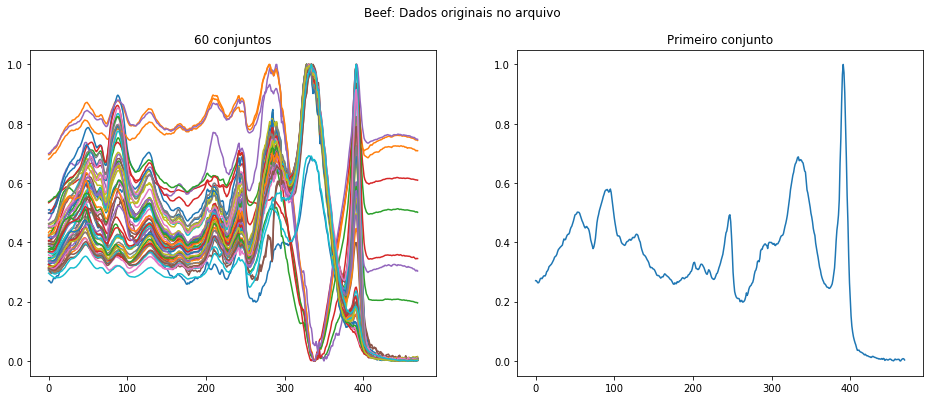

Lendo arquivo Coffee...
56 conjuntos de dados. Tamanho de cada um:
[287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287]
Gerando imagens para Coffee...
0%
8%
17%
26%
35%
44%
53%
62%
71%
80%
89%
98%
Dimensões das imagens geradas: (56L, 16L, 16L, 3L)
Imagens salvas em imagens_Coffee_16x16.pkl
Gerando imagens para Coffee...
0%
8%
17%
26%
35%
44%
53%
62%
71%
80%
89%
98%
Dimensões das imagens geradas: (56L, 32L, 32L, 3L)
Imagens salvas em imagens_Coffee_32x32.pkl


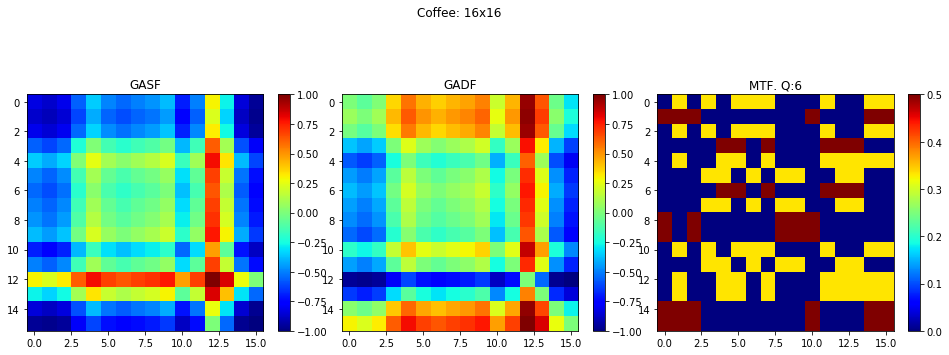

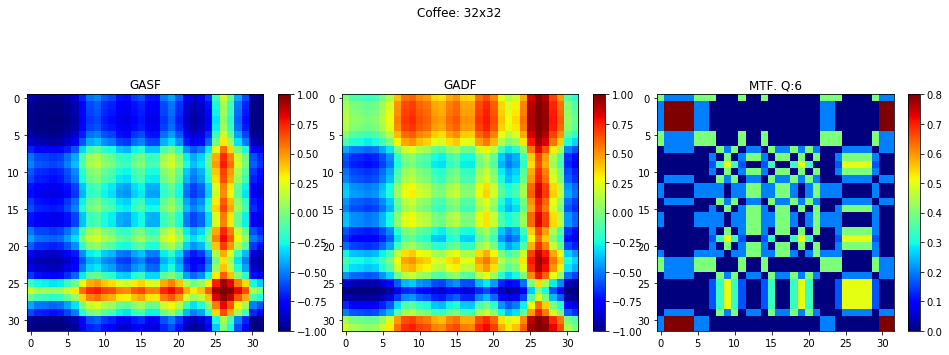

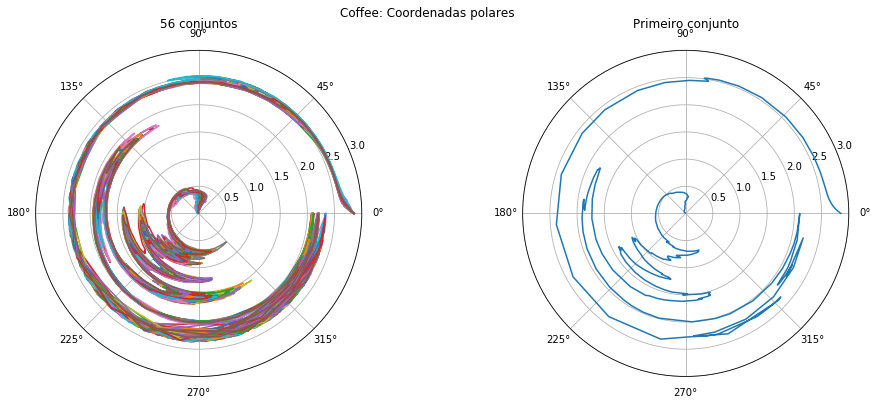

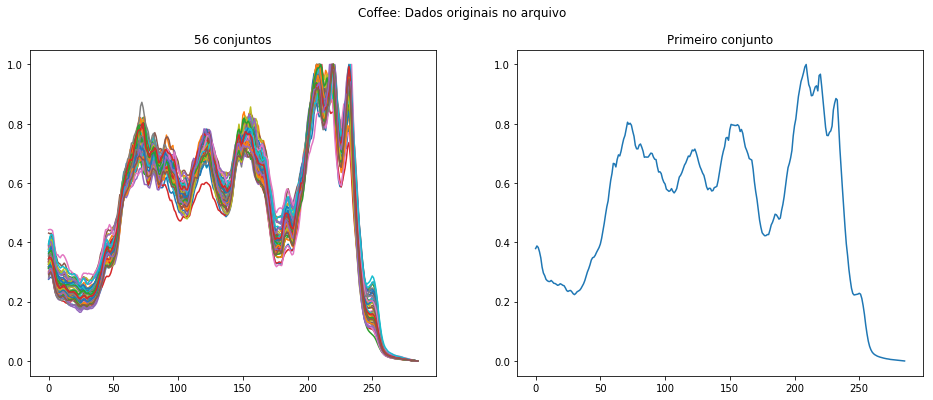

Lendo arquivo OliveOil...
60 conjuntos de dados. Tamanho de cada um:
[571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571, 571]
Gerando imagens para OliveOil...
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
Dimensões das imagens geradas: (60L, 16L, 16L, 3L)
Imagens salvas em imagens_OliveOil_16x16.pkl
Gerando imagens para OliveOil...
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
Dimensões das imagens geradas: (60L, 32L, 32L, 3L)
Imagens salvas em imagens_OliveOil_32x32.pkl


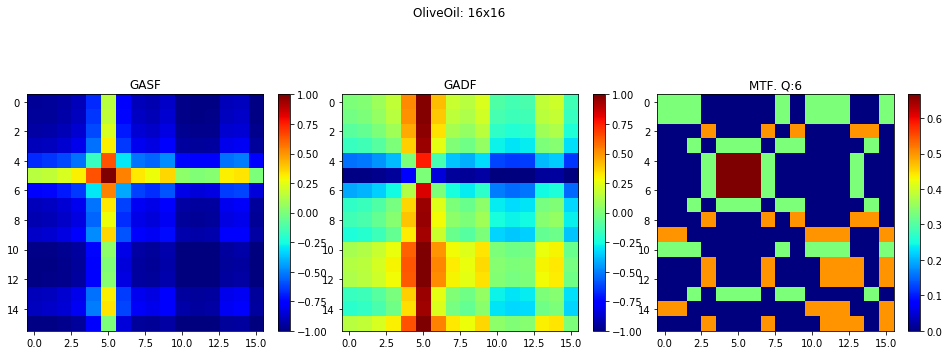

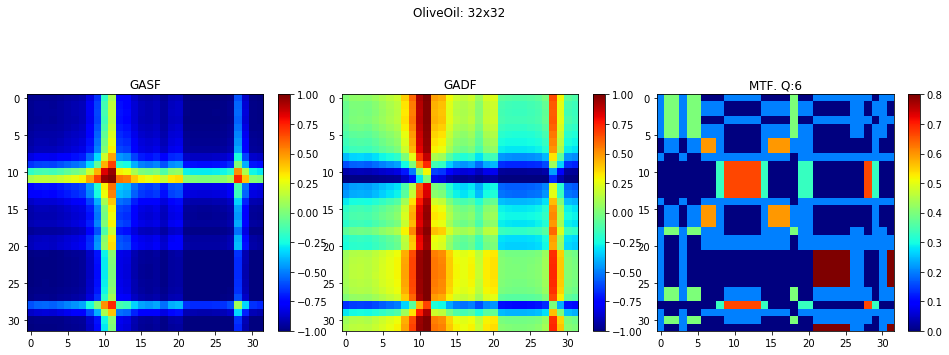

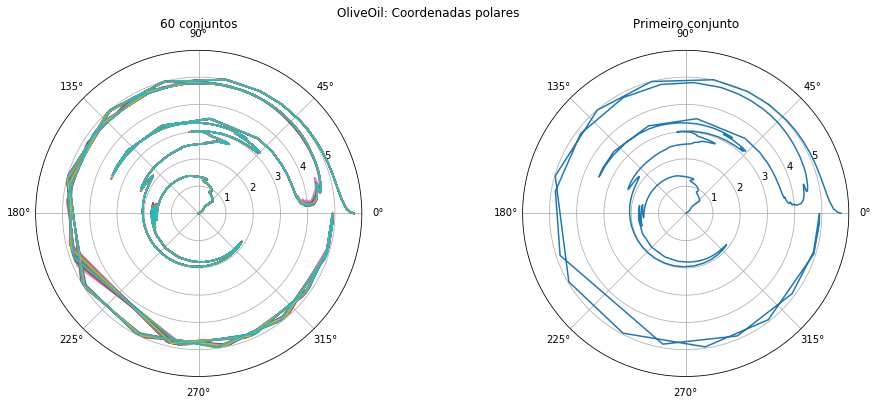

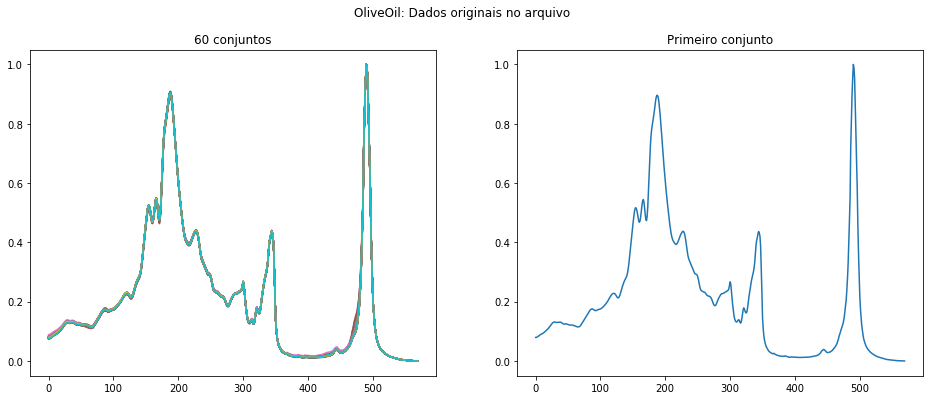

In [5]:
for datafile, train in zip(datafiles,trains):    
    print 'Lendo arquivo '+datafile+'...';
    data = open(datafile).readlines()
    data = [map(float, x.replace(","," ").strip().split()) for x in data]
    print len(data), 'conjuntos de dados. Tamanho de cada um:'
    print [len(x) for x in data]
    
    for s in PAA_tamanho:
        for Q in quantile:
            print 'Gerando imagens para '+datafile+'...';
            image_GASF,image_GADF,image_MTF,label = [],[],[],[]
            for i,x in enumerate(data):
                label.append(x[0])
                if i%round(len(data)/10) == 0:
                    print str(i*100/len(data))+'%';
                if(PAA_smooth):
                    data_padr = reescalar(PiecewiseAggregationApproximation(x[1:], s));
                else:    
                    data_padr = reescalar(x[1:]);
                    s = len(data_padr);
                data_cos = np.matrix(np.array(data_padr));
                data_sin = np.matrix(np.sqrt(1-np.array(data_padr)**2));

                #GASF
                matrix_GASF = np.array(data_cos.T*data_cos-data_sin.T*data_sin)
                if(gaussian_blur): matrix_GASF = cv2.GaussianBlur(np.asarray(matrix_GASF),(5,5),0);
                image_GASF.append(matrix_GASF);

                #GADF
                matrix_GADF = np.array(data_sin.T*data_cos-data_cos.T*data_sin);
                if(gaussian_blur): matrix_GADF = cv2.GaussianBlur(np.asarray(matrix_GADF),(5,5),0);
                image_GADF.append(matrix_GADF);

                #MTF
                column, matindex = [],[];
                dic = dict(zip(set(data_padr), pd.qcut(list(set(data_padr)), Q).codes));
                mat = np.zeros([Q,Q]);
                [matindex.append(dic[x]) for x in data_padr];
                for i in range(0, len(matindex)-1):
                    mat[matindex[i]][matindex[i+1]] += 1;
                for i in xrange(Q):
                    if sum(mat[i][:]) == 0:
                        continue
                    mat[i][:] = mat[i][:]/sum(mat[i][:]);
                for p in range(len(data_padr)):
                        for q in range(len(data_padr)):
                            column.append(mat[matindex[p]][matindex[(q)]])
                column = np.array(column)
                matrix_MTF = column.reshape(len(data_padr),len(data_padr));
                if(gaussian_blur): matrix_MTF = cv2.GaussianBlur(np.asarray(matrix_MTF),(5,5),0);
                image_MTF.append(matrix_MTF)
            
            label = np.asarray(label)
            image_GASF = np.asarray(image_GASF);
            image_GADF = np.asarray(image_GADF);
            image_MTF = np.asarray(image_MTF);
            
            #Juntar imagens e salvar
            images_pickle = np.stack((image_GASF,image_GADF,image_MTF),3)
            print 'Dimensões das imagens geradas:',images_pickle.shape;                                  
            if(salvar_imagens): pickledata(images_pickle, label, train, 'imagens_'+datafile+'_'+str(s)+'x'+str(s))           
            
            #Imagens GASF GADF MTF
            fig, ax = plt.subplots(1,3);
            fig.suptitle(datafile+': '+str(s)+'x'+str(s));
            ax[0].set_title('GASF');
            fig.colorbar(ax[0].imshow(image_GASF[0], cmap=cm.jet), cax = make_axes_locatable(ax[0]).append_axes("right", size="5%", pad=0.2));
            ax[1].set_title('GADF');
            fig.colorbar(ax[1].imshow(image_GADF[0], cmap=cm.jet), cax = make_axes_locatable(ax[1]).append_axes("right", size="5%", pad=0.2));
            ax[2].set_title('MTF. Q:'+str(Q));
            fig.colorbar(ax[2].imshow(image_MTF[0], cmap=cm.jet), cax = make_axes_locatable(ax[2]).append_axes("right", size="5%", pad=0.2));
    
    #Coordenadas polares
    fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'));
    fig.suptitle(datafile+': Coordenadas polares');
    [ax[0].plot(np.array(reescalar(data[x][1:]))*2*np.pi, np.array(range(1,len(data[x])))/100.0) for x in range(len(data))];
    ax[0].set_title(str(len(data)) + ' conjuntos');
    ax[1].plot(np.array(reescalar(data[0][1:]))*2*np.pi, np.array(range(1,len(data[0])))/100.0);
    ax[1].set_title('Primeiro conjunto');

    #Dados originais   
    fig, ax = plt.subplots(1, 2);
    fig.suptitle(datafile+': Dados originais no arquivo');
    [ax[0].plot(reescalar(data[x][1:])) for x in range(len(data))]
    ax[0].set_title(str(len(data)) + ' conjuntos');
    ax[1].plot(reescalar(data[0][1:]));
    ax[1].set_title('Primeiro conjunto');
    plt.show();